In [31]:
import pandas as pd 
import numpy as np

In [32]:
df = pd.read_csv('C:/Users/Dev/OneDrive/Desktop/Jupyter/RNN_LSTM/LSTM-Multivariate_pollution.csv')
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [33]:
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format='True')

In [35]:
df['date'].head()

0   2010-01-02 00:00:00
1   2010-01-02 01:00:00
2   2010-01-02 02:00:00
3   2010-01-02 03:00:00
4   2010-01-02 04:00:00
Name: date, dtype: datetime64[ns]

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

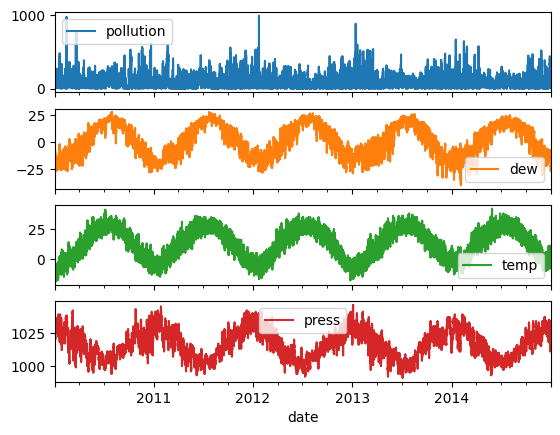

In [68]:
import matplotlib.pyplot as plt 
df.set_index('date')[['pollution','dew','temp','press']].plot(subplots=True)

In [36]:
df_input = df[['pollution','dew','temp','press','wnd_spd']]
df_input.head()

,pollution,dew,temp,press,wnd_spd
0,129.0,-16,-4.0,1020.0,1.79
1,148.0,-15,-4.0,1020.0,2.68
2,159.0,-11,-5.0,1021.0,3.57
3,181.0,-7,-5.0,1022.0,5.36
4,138.0,-7,-5.0,1022.0,6.25


In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
df_input = scaler.fit_transform(df_input)


In [39]:
attributes = df_input
target = df_input[:,0]
target

array([0.12977867, 0.14889336, 0.15995976, ..., 0.01006036, 0.00804829,
       0.01207243])

In [40]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
length = 32
num_attributes = 5
x_train, x_test, y_train, y_test = train_test_split(attributes,target, test_size=0.20)
train_generator = TimeseriesGenerator(x_train, y_train, length=length)
test_generator = TimeseriesGenerator(x_test, y_test, length=length)

In [42]:
print(type(train_generator))

<class 'keras.preprocessing.sequence.TimeseriesGenerator'>


In [52]:
from keras.models import Sequential
from keras.layers import Dense,Activation,LSTM, Dropout

model = Sequential()
model.add(LSTM(128, input_shape =(length,num_attributes), return_sequences = True))
model.add(LSTM(128, input_shape =(length,num_attributes), return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'relu'))




In [53]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 32, 128)           68608     
                                                                 
 lstm_19 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 200,321
Trainable params: 200,321
Non-trainable params: 0
_________________________________________________________________


In [69]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',patience = 2, mode = 'min')
model.compile(loss='mean_squared_error',
             optimizer = tf.keras.optimizers.Adam(learning_rate=1),metrics = tf.metrics.MeanSquaredError())

history = model.fit(train_generator,epochs = 50,callbacks = [early_stopping])

Epoch 1/50
274/274 [==============================] - 131s 468ms/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 2/50
274/274 [==============================] - 130s 474ms/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 3/50
274/274 [==============================] - 126s 461ms/step - loss: 0.0176 - mean_squared_error: 0.0176


In [70]:
scores = model.evaluate(test_generator, verbose=0)
print('The Mean Squared Error is:',scores[1])




The Mean Squared Error is: 0.017529204487800598
